In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty-50-minute-data/NIFTY INFRA_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY 100_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY CONSR DURBL_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY CONSUMPTION_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY AUTO_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY LARGEMID250_minute.csv
/kaggle/input/nifty-50-minute-data/INDIA VIX_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY INDIA MFG_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY GS COMPSITE_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY IND DIGITAL_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY FMCG_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY ENERGY_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY IT_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY CPSE_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY FIN SERVICE_minute.csv
/kaggle/input/nifty-50-minute-data/NIFTY ALPHA 50_minute.csv
/kaggle/input/nifty-50-minute-data/NIF

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/nifty-50-minute-data/INDIA VIX_minute.csv')
df.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,16.47,16.47,14.46,15.39,0
1,2015-01-09 09:16:00,15.39,15.47,15.33,15.45,0
2,2015-01-09 09:17:00,15.45,15.51,15.41,15.46,0
3,2015-01-09 09:18:00,15.46,15.50,15.33,15.40,0
4,2015-01-09 09:19:00,15.39,15.40,15.29,15.35,0


In [4]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [5]:
import matplotlib.pyplot as plt

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

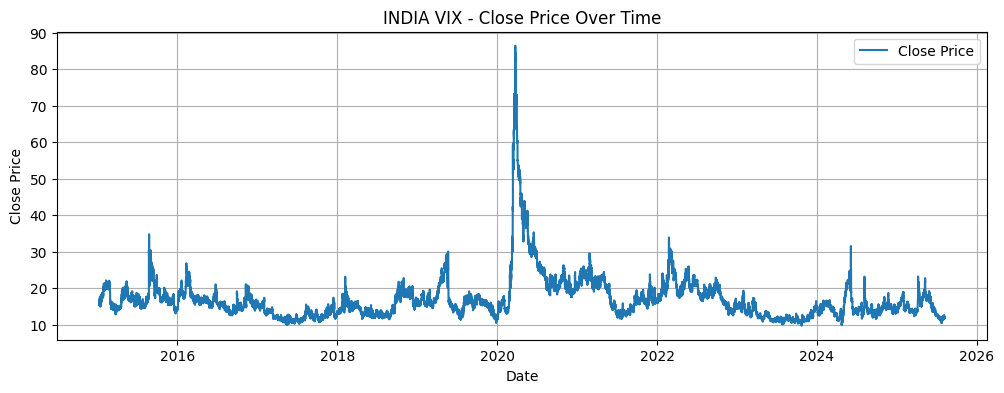

In [6]:
# Plot closing price over time
plt.figure(figsize=(12, 4))
plt.plot(df['close'], label='Close Price')
plt.title('INDIA VIX - Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

In [7]:
# Create target variable: next close price
df['target'] = df['close'].shift(-1)

# Drop missing value (last row)
df.dropna(inplace=True)

In [8]:
# Features and target
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['target']

In [9]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [10]:
from lightgbm import LGBMRegressor

# Train model
model = LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 782464, number of used features: 4
[LightGBM] [Info] Start training from score 17.631806


LGBMRegressor()

In [11]:
# Predict
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Print scores
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 0.06507226607911011
R2 Score: 0.9993472303857502


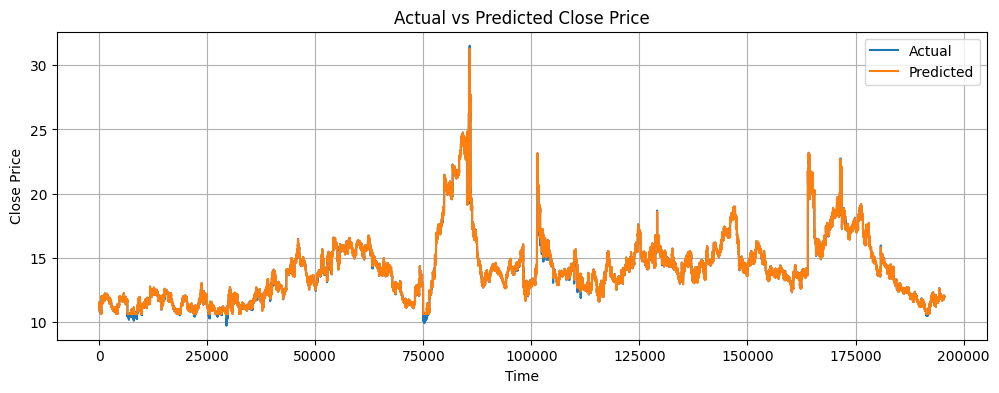

In [13]:
# Plot actual vs predicted
plt.figure(figsize=(12, 4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()